In [14]:
# privacy engineering project
print('calculating own metrics and plot')
from google.colab import files
uploaded = files.upload()


calculating own metrics and plot


Saving COVID-19_Treatments_20250203.csv to COVID-19_Treatments_20250203 (1).csv


Discernibility Metric (DM): 154679
Normalized Certainty Penalty (NCP): 0.0000
Average Equivalence Class Size (AECS): 1.39
Class Size Entropy: 15.2004
Fraction of Classes with size=2: 0.0904
Suppression Rate: 0.0000


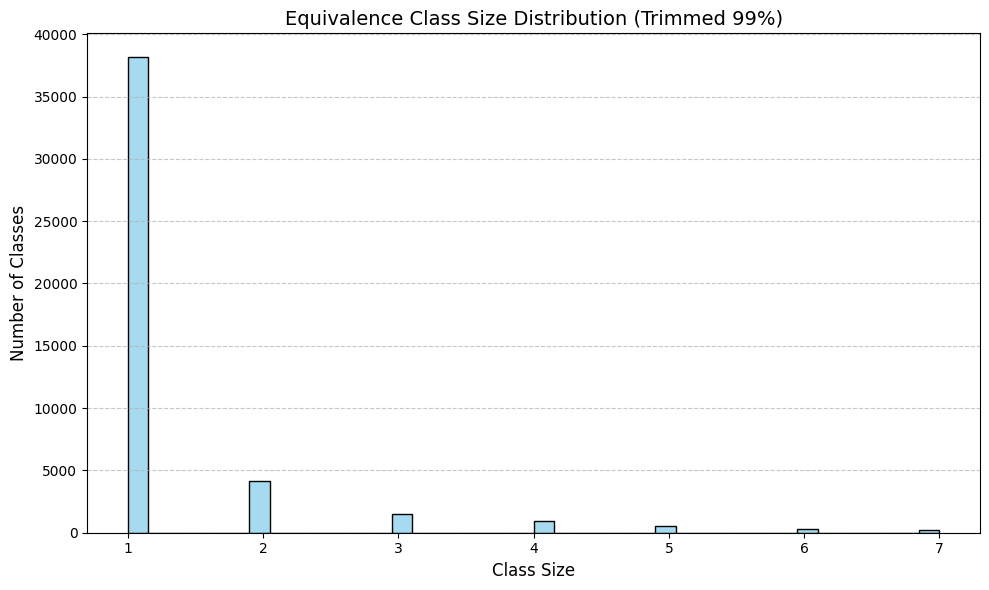

In [17]:
# Step 2: Imports
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 3: Configuration
quasi_identifiers = ["City", "State", "Zip"]
max_generalization_level = {"City": 1, "State": 1, "Zip": 4}

# Step 4: Load the CSV file
df = pd.read_csv("COVID-19_Treatments_20250203.csv")

# Step 5: Discernibility Metric (DM)
def compute_discernibility_metric(df, qis):
    qi_groups = df[qis].astype(str).agg("|".join, axis=1)
    counts = Counter(qi_groups)
    return sum(count ** 2 for count in counts.values())

# Step 6: Normalized Certainty Penalty (NCP)
def compute_ncp(df, qis, max_levels):
    n = len(df)
    total_ncp = 0.0
    for qi in qis:
        attr_vals = df[qi].astype(str)
        attr_ncp = 0.0
        for val in attr_vals:
            if "*" in val:
                level = val.count("*")
                normalized = min(level / max_levels[qi], 1.0)
            else:
                normalized = 0.0
            attr_ncp += normalized
        total_ncp += attr_ncp / n
    return total_ncp / len(qis)

# Step 7: Average Equivalence Class Size (AECS)
def compute_aecs(df, qis):
    qi_groups = df[qis].astype(str).agg("|".join, axis=1)
    counts = Counter(qi_groups)
    return np.mean(list(counts.values()))

# Step 8: Entropy of Equivalence Class Sizes
def compute_class_size_entropy(df, qis):
    qi_groups = df[qis].astype(str).agg("|".join, axis=1)
    counts = Counter(qi_groups).values()
    probs = [c / sum(counts) for c in counts]
    entropy = -sum(p * np.log2(p) for p in probs if p > 0)
    return entropy

# Step 9: Fraction of Equivalence Classes of size k
def compute_fraction_of_k_sized_classes(df, qis, k):
    qi_groups = df[qis].astype(str).agg("|".join, axis=1)
    counts = Counter(qi_groups).values()
    num_k = sum(1 for c in counts if c == k)
    return num_k / len(counts)

# Step 10: Suppression Rate (cell or record level marked by '*')
def compute_suppression_rate(df, qis):
    suppressed_rows = df[qis].apply(lambda row: any('*' in val for val in row), axis=1).sum()
    return suppressed_rows / len(df)

# Step 11: Equivalence Class Size Distribution Plot
def plot_equiv_class_distribution(df, qis):
    qi_groups = df[qis].astype(str).agg("|".join, axis=1)
    counts = Counter(qi_groups)
    class_sizes = list(counts.values())

    cutoff = np.percentile(class_sizes, 99)
    trimmed = [size for size in class_sizes if size <= cutoff]

    plt.figure(figsize=(10, 6))
    sns.histplot(trimmed, bins=40, kde=False, color="skyblue", edgecolor="black")
    plt.title("Equivalence Class Size Distribution (Trimmed 99%)", fontsize=14)
    plt.xlabel("Class Size", fontsize=12)
    plt.ylabel("Number of Classes", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Step 12: Run all metrics
dm = compute_discernibility_metric(df, quasi_identifiers)
ncp = compute_ncp(df, quasi_identifiers, max_generalization_level)
aecs = compute_aecs(df, quasi_identifiers)
entropy = compute_class_size_entropy(df, quasi_identifiers)
fraction_k = compute_fraction_of_k_sized_classes(df, quasi_identifiers, k=2)
suppression = compute_suppression_rate(df, quasi_identifiers)

print(f"Discernibility Metric (DM): {dm}")
print(f"Normalized Certainty Penalty (NCP): {ncp:.4f}")
print(f"Average Equivalence Class Size (AECS): {aecs:.2f}")
print(f"Class Size Entropy: {entropy:.4f}")
print(f"Fraction of Classes with size=2: {fraction_k:.4f}")
print(f"Suppression Rate: {suppression:.4f}")

# Step 13: Plot the class size distribution
plot_equiv_class_distribution(df, quasi_identifiers)
